# Dengue y Panaderia - PCA y K-Mean Clustering

(primera parte)
a. Encuentre el número óptimo del clusters en el dataset dengue usando como features 'humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin' El dataset set puede bajar de esta pagina https://vincentarelbundock.github.io/Rdatasets/datasets.html Utilice http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html para encontrar los clusters. (segunda parte)

(segunda parte)

b. Utilizando el siguiente dataset https://www.kaggle.com/xvivancos/transactions-from-a-bakery encuentre patrones de compras a partir de métodos PCA y k-mean clustering.
(nuevo lugar del dataset https://github.com/hugotrigueiro/Dataset-Transactions-from-a-Bakery-Exploratory-Data-Analysis-/tree/master/Transactions-from-a-Bakery)

En este notebook les muestro MI solución (los resultados obtenidos no son los mejores 3.8/5) pero el método está bien implementado
Acá pongo un link a la solución que mandó Jaime que hizo la vieja para este ejercicio, ya está bien comentado y todo.
https://github.com/ComputoCienciasUniandes/MetodosComputacionalesAvanzados/blob/master/soluciones/NathaliaCardona_ejercicio24.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Dengue

PCA y K-Means clustering con los datos Dengue

# PCA (Dengue)

In [120]:
#Lectura de datos y selección de variables de interés
df = pd.read_csv("dengue.csv").dropna()           
X = df[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']].values

#Normalización de los datos, esto permite mayor homogeneidad y facilidad para hacer PCA más adelante
sc = StandardScaler()
X = sc.fit_transform(X)
#Hay varios modos de normalizar: MinMaxScaler por ejemplo. Ambos son sensibles a datos atípicos muy lejanos al promedio

In [174]:
n_feat = 6 #Features, las 6 variables elegidas

pca = PCA(n_components= None)          #None- toma por default "n_components == min(n_samples, n_features) - 1" 6 comp.
Xn  = pca.fit_transform(X)             #Aplica PCA a los datos normalizados/estandarizados

#Recordemos que PCA nos ayuda a reducir dimensionalidad conservando las variables con mayor varianza, aquellas que logran
#explicar un porcentaje significativo de los datos

EVR = pca.explained_variance_ratio_    #Explained Variance Ratio, porcentaje de varianza explicada
CVR = []                               #Cumulative Variance Ratio, porcentaje de varianza explicada acumulada

evr = 0                                #Inicializo la varianza explicada
for i in range(0,n_feat):
    evr += EVR[i]                      #EVR[i] me da la varianza de la componente i-ésima, son 6 por default
    CVR.append(evr)                    #La acumulativa es ir agregando un valor a CVR con la suma actualizada

XX = Xn[:,0]                           #Estos son los ejes de la primera y segunda componente, resultantes de haber transformado X
YY = Xn[:,1]

C = pca.components_                    #Componentes de PCA, defino Slope para graficar lo

def Slope(A, B):
    return B/A

L = np.linspace(-3,3)
Lev = np.linspace(1, n_feat, len(EVR))  #Linspace explained variance

Explaided Variance Ratio = [0.75129373 0.12866246 0.10165757 0.01568738 0.00161062 0.00108824]


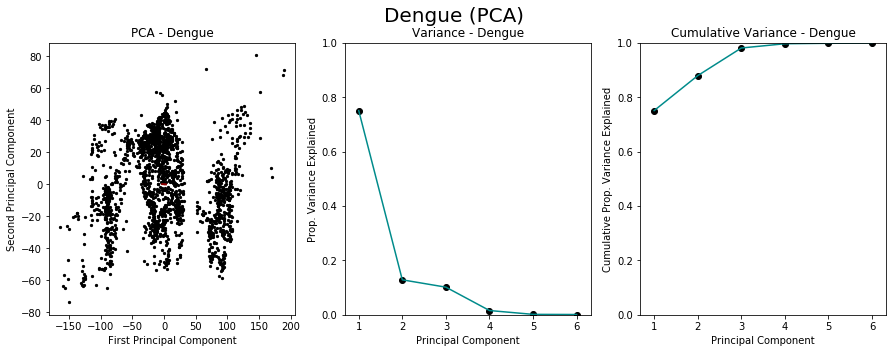

In [175]:
plt.figure(figsize=(15,5))

plt.suptitle("Dengue (PCA)", fontsize=20)
plt.subplot(1,3,1)
plt.title('PCA - Dengue')
plt.scatter(XX, YY, color = "black", s=5)
for i in range(0,3):
    plt.plot(L, Slope(C[0,i], C[1,i])*L, color = 'darkred')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.subplot(1,3,2)
plt.title('Variance - Dengue')
plt.plot(Lev, EVR, color="darkcyan")
plt.scatter(Lev, EVR, marker='o', color="black")
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.ylim(0,1)

plt.subplot(1,3,3)
plt.title('Cumulative Variance - Dengue')
plt.plot(Lev, CVR, color="darkcyan")
plt.scatter(Lev, CVR, marker='o', color="black")
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.ylim(0,1)

print('Explaided Variance Ratio = '+str(EVR))

In [167]:
X = df[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']].values
mms = MinMaxScaler()
mms.fit(X)
Xtrans = mms.transform(X)

#K-Means
K=10
SSD = []
Acum = []
R = range(1,K,1)

C = 0
for i in R:
    km = KMeans(n_clusters=i).fit(Xtrans)
    SSD.append(km.inertia_)
    C+=km.inertia_
    Acum.append(C)

Optimal Cluster=2


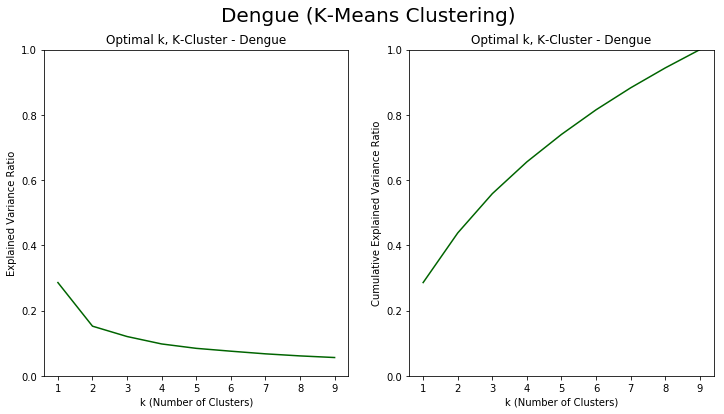

In [125]:
plt.figure(figsize=(12,6))
plt.suptitle("Dengue (K-Means Clustering)", fontsize=20)

plt.subplot(1,2,1)
plt.title("Optimal k, K-Cluster - Dengue")
plt.xlabel("k (Number of Clusters)")
plt.ylabel("Explained Variance Ratio")
plt.ylim(0,1)
plt.plot(R, SSD/np.sum(SSD), color="darkgreen")
plt.subplot(1,2,2)
plt.title("Optimal k, K-Cluster - Dengue")
plt.xlabel("k (Number of Clusters)")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.plot(R, Acum/np.sum(SSD), color="darkgreen")
plt.ylim(0,1)

print("Optimal Cluster=2")

# Panaderia

In [14]:
#Preprocessing Data: Separando la fecha en: dia, mes, año y elimine de la hora la cantidad de segundos.
df = pd.read_csv("BreadBasket_DMS.csv").dropna()

D = []#"Day"
M = []#"Month"]
Y = []#"Year"]
H = []#"Hour"]
S = []#"Secs"]
Mn = []#"Minutes"]
T = [] #Transaction

for i in (df['Date'][1:]):
    K = i.split("-")
    D.append(K[2])
    M.append(K[1])
    Y.append(K[0])
    
for i in (df['Time'][1:]):
    K = i.split(':')
    H.append(K[0])
    Mn.append(K[1])
    S.append(K[2])

for i in (df['Transaction'][1:]):
    T.append(i)
    

C:\Users\CristianMB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype <U4 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Explaided Variance Ratio = [0.33185829 0.1859788  0.16963203 0.1633437  0.14659287 0.0025943 ]


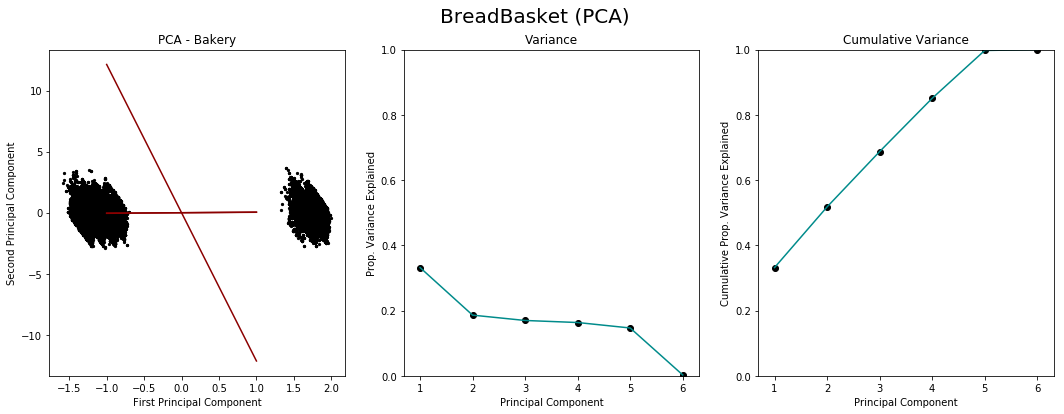

In [15]:
A = [D, M, Y, H, Mn, S]

#Set de datos procesado
X = np.transpose(np.array(A))
#PCA
n_feat = len(A)

sc = StandardScaler()
X = sc.fit_transform(X)

pca_none = PCA(n_components=None)
X_none = pca_none.fit_transform(X)

EVR = pca_none.explained_variance_ratio_
CVR = []  #Cumulative Variance Ratio
counter = EVR[0]
for i in range(0,n_feat):
    if i > 0:
        counter += EVR[i]
    CVR.append(counter)
    
pca_2C = PCA(n_components=2)
newX = pca_2C.fit_transform(X)
XX = newX[:,0]
YY = newX[:,1]

C = pca_2C.components_  #Componentes

def Slope(A, B):
    return B/A

L = np.linspace(-1,1)
Levr = np.linspace(1, n_feat, len(EVR))
Lcvr = np.linspace(1, n_feat, len(EVR))

plt.figure(figsize=(18,6))
plt.suptitle("BreadBasket (PCA)", fontsize=20)

plt.subplot(1,3,1)
plt.title('PCA - Bakery')
plt.scatter(XX, YY, color = "black", s=5)
for i in range(0,3):
    plt.plot(L, Slope(C[0,i], C[1,i])*L, color = 'darkred')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.subplot(1,3,2)
plt.title('Variance')
plt.plot(Levr, EVR, color="darkcyan")
plt.scatter(Levr, EVR, marker='o', color="black")
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.ylim(0,1)

plt.subplot(1,3,3)
plt.title('Cumulative Variance')
plt.plot(Lcvr, CVR, color="darkcyan")
plt.scatter(Lcvr, CVR, marker='o', color="black")
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.ylim(0,1)

print('Explaided Variance Ratio = '+str(EVR))

In [16]:
X = np.transpose(np.array([D, M,Mn, Y, H, S, T]))

mms = MinMaxScaler()
mms.fit(X)
Xtrans = mms.transform(X)

#K-Means
K=20
SSD = []
Acum = []
R = range(1,K,1)

C = 0
for i in R:
    km = KMeans(n_clusters=i).fit(Xtrans)
    SSD.append(km.inertia_)
    C+=km.inertia_
    Acum.append(C)

C:\Users\CristianMB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype <U4 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Optimal Cluster=2


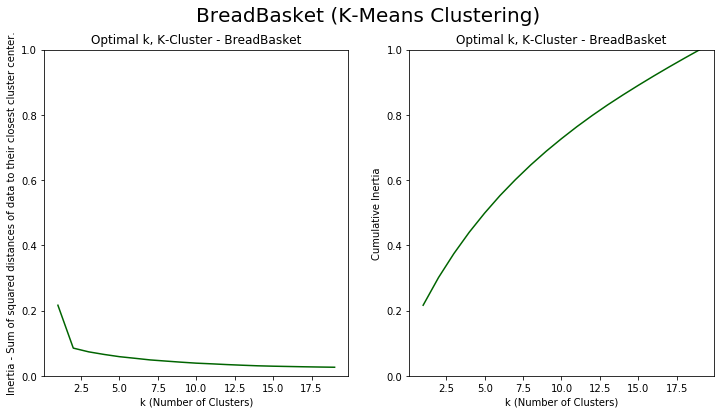

In [17]:
plt.figure(figsize=(12,6))
plt.suptitle("BreadBasket (K-Means Clustering)", fontsize=20)

plt.subplot(1,2,1)
plt.title("Optimal k, K-Cluster - BreadBasket")
plt.xlabel("k (Number of Clusters)")
plt.ylabel("Inertia - Sum of squared distances of data to their closest cluster center.")
plt.ylim(0,1)
plt.plot(R, SSD/np.sum(SSD), color="darkgreen")
plt.subplot(1,2,2)
plt.title("Optimal k, K-Cluster - BreadBasket")
plt.xlabel("k (Number of Clusters)")
plt.ylabel("Cumulative Inertia")
plt.plot(R, Acum/np.sum(SSD), color="darkgreen")
plt.ylim(0,1)


print("Optimal Cluster=2")